In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Forest cover

**Goal:** to predict the forest cover type (the predominant kind of tree cover) (`Cover_Type`) from strictly cartographic variables (as opposed to remotely sensed data).

This data includes four wilderness areas located in the Roosevelt National Forest of northern Colorado.

**Data Description**

| Feature | Description |
| :- | -: |
| Elevation | Elevation in meters
| Aspect | Aspect in degrees azimuth
| Slope | Slope in degrees
| Horizontal_Distance_To_Hydrology | Horz Dist to nearest surface water features (in meters)
| Vertical_Distance_To_Hydrology | Vert Dist to nearest surface water features (in meters)
| Horizontal_Distance_To_Roadways | Horz Dist to nearest roadway (in meters)
| Hillshade_9am | Hillshade index at 9am, summer solstice
| Hillshade_Noon | Hillshade index at noon, summer soltice
| Hillshade_3pm | Hillshade index at 3pm, summer solstice
| Horizontal_Distance_To_Fire_Points | Horz Dist to nearest wildfire ignition points (in meters)
| Wilderness_Area (4 binary columns) | 0 (absence) or 1 (presence) / Wilderness area designation
| Soil_Type (40 binary columns) | 0 (absence) or 1 (presence) / Soil Type designation
| Cover_Type (target vector) | Forest Cover Type designation

The seven **cover types** are:

 - Spruce/Fir
 - Lodgepole Pine
 - Ponderosa Pine
 - Cottonwood/Willow
 - Aspen
 - Douglas-fir
 - Krummholz

The **wilderness areas** are:

 - Rawah Wilderness Area
 - Neota Wilderness Area
 - Comanche Peak Wilderness Area
 - Cache la Poudre Wilderness Area

The **soil types** are:

- Cathedral family - Rock outcrop complex, extremely stony.
- Vanet - Ratake families complex, very stony.
- Haploborolis - Rock outcrop complex, rubbly.
- Ratake family - Rock outcrop complex, rubbly.
- Vanet family - Rock outcrop complex complex, rubbly.
- Vanet - Wetmore families - Rock outcrop complex, stony.
- Gothic family.
- Supervisor - Limber families complex.
- Troutville family, very stony.
- Bullwark - Catamount families - Rock outcrop complex, rubbly.
- Bullwark - Catamount families - Rock land complex, rubbly.
- Legault family - Rock land complex, stony.
- Catamount family - Rock land - Bullwark family complex, rubbly.
- Pachic Argiborolis - Aquolis complex.
- unspecified in the USFS Soil and ELU Survey.
- Cryaquolis - Cryoborolis complex.
- Gateview family - Cryaquolis complex.
- Rogert family, very stony.
- Typic Cryaquolis - Borohemists complex.
- Typic Cryaquepts - Typic Cryaquolls complex.
- Typic Cryaquolls - Leighcan family, till substratum complex.
- Leighcan family, till substratum, extremely bouldery.
- Leighcan family, till substratum - Typic Cryaquolls complex.
- Leighcan family, extremely stony.
- Leighcan family, warm, extremely stony.
- Granile - Catamount families complex, very stony.
- Leighcan family, warm - Rock outcrop complex, extremely stony.
- Leighcan family - Rock outcrop complex, extremely stony.
- Como - Legault families complex, extremely stony.
- Como family - Rock land - Legault family complex, extremely stony.
- Leighcan - Catamount families complex, extremely stony.
- Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- Cryorthents - Rock land complex, extremely stony.
- Cryumbrepts - Rock outcrop - Cryaquepts complex.
- Bross family - Rock land - Cryumbrepts complex, extremely stony.
- Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- Leighcan - Moran families - Cryaquolls complex, extremely stony.
- Moran family - Cryorthents - Leighcan family complex, extremely stony.
- Moran family - Cryorthents - Rock land complex, extremely stony.

In [2]:
# load the data
path = '/Users/liamhettinger/Documents/Portfolio_work/Data/forest_cover.csv'
forest_cover = pd.read_csv(path)
forest_cover.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [3]:
#define X and Y
X = forest_cover.drop('Cover_Type', axis = 1)
y = forest_cover.Cover_Type

In [4]:
#Variables label are 1-7 changing them to 0-6
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [6]:
#define model
forest_clf = RandomForestClassifier(n_jobs = -1) 

- **min_samples_leaf** minimum samples required on output leaf node
- **min_samples_split** minimum samples required in node to split
- **n_estimators** number of trees
- **max_depth** max depth of the trees. prevents overfitting

In [7]:
#setting grid search parameters
parameters = {"min_samples_leaf" : [1, 4,  8], # default 1
              "min_samples_split" : [2, 4, 8], # default 2
              "n_estimators" : [10, 50, 150], # default 100
              "max_depth" : [2,5,10,15,20]}

In [8]:
#defining grid search
grid = GridSearchCV(forest_clf, parameters,cv=5,scoring='accuracy',n_jobs=-1,verbose=True)

In [9]:
#fitting model and tuning parameters
grid.fit(X,y)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 150]},
             scoring='accuracy', verbose=True)

In [10]:
#best model accuracy score
grid.best_score_

0.6531084656084657

In [11]:
#parameters that acheived the best accuracy score
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [12]:
#predicting y_test targets using random forest model
y_test_pred = grid.predict(X_test)

In [13]:
#random forest accuracy score
accuracy_rf = accuracy_score(y_test,y_test_pred)
accuracy_rf

0.9970899470899471

In [14]:
#random forest confusion matrix
confusion_rf = confusion_matrix(y_test, y_test_pred)
confusion_rf

array([[516,   0,   0,   0,   2,   0,   0],
       [  1, 562,   0,   0,   5,   1,   0],
       [  0,   0, 560,   0,   1,   0,   0],
       [  0,   0,   0, 536,   0,   0,   0],
       [  0,   0,   0,   0, 526,   0,   0],
       [  0,   0,   0,   1,   0, 556,   0],
       [  0,   0,   0,   0,   0,   0, 513]])

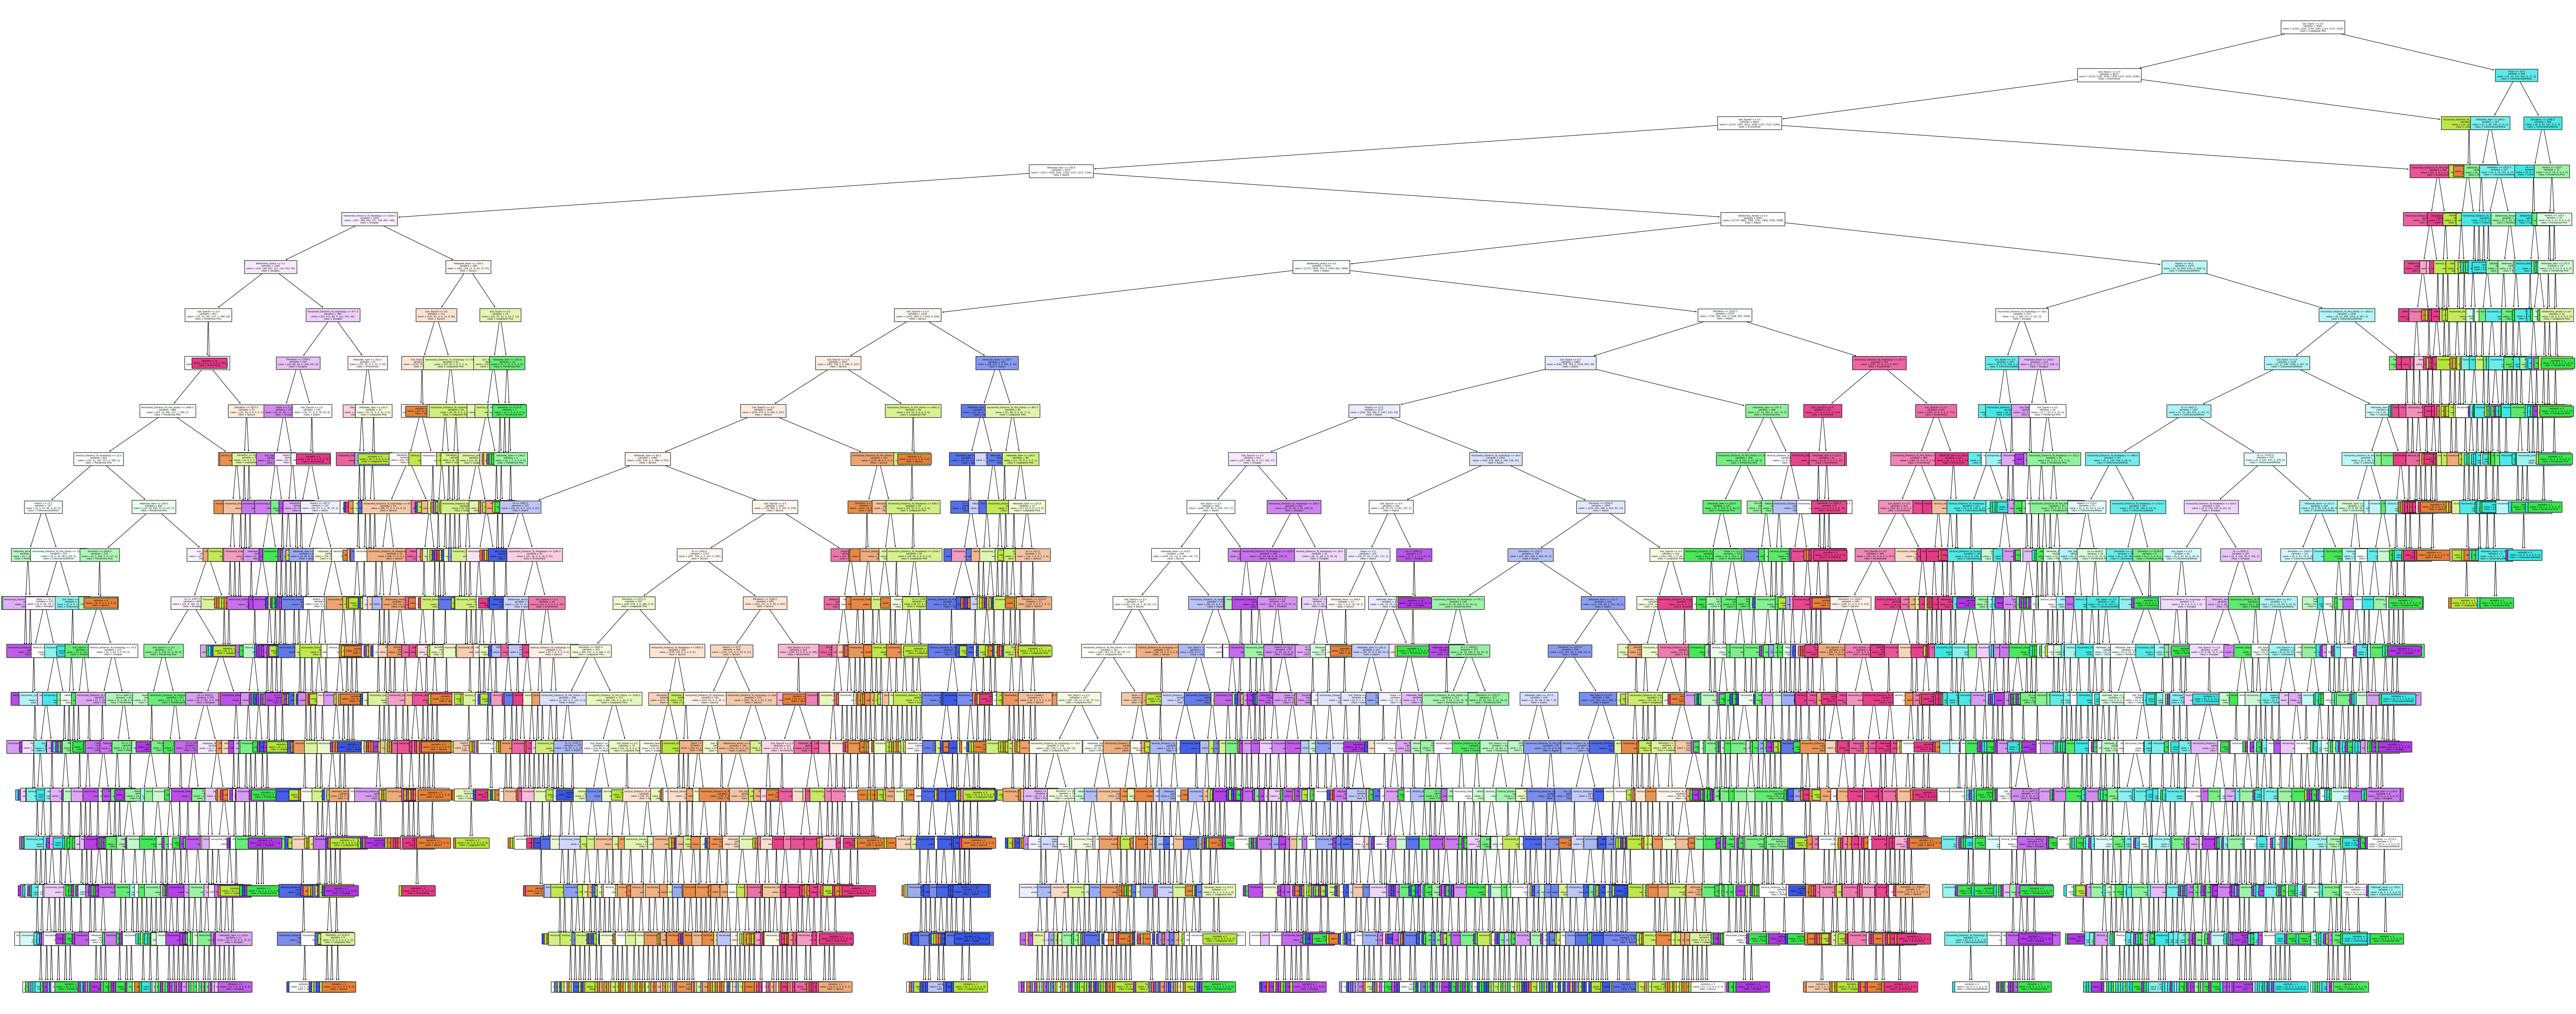

In [15]:
# visualize tree tree too small to see. plt.savefig allows a for a better visual.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(100,40))
plot_tree(grid.best_estimator_.estimators_[0], 
              feature_names=X.columns.tolist(), 
              class_names =['Spruce','Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas','Krummholz'],
              filled=True, impurity=False, fontsize=5)
plt.show()
# plt.savefig()

## XGBoost Classification

In [16]:
#defining model
xgb_model = xgb.XGBClassifier(objective="multi:softprob")

- **colsample_bytree** proportion of the sample used to train the tree. Similar to a random forest. 
- **Gamma** Required loss reduction to make another node. The larger gamma is, the more conservative the algorithm will be. Range: [0,∞]
- **learning_rate** Boosting assigns feature weights. The learning rate shrinks those weights to prevent overfitting. Step size shrinkage. Prevents overfitting. range: [0,1]
- **max_depth** Maximum depth of a tree. Larger number of trees can cause overfitting. 0 means no limit. range: [0,∞]

In [17]:
#establishing parameters
parameters = {
    'colsample_bytree' : [0.7, 0.5, 0.2],
    'gamma' : [0, 0.25, 0.5],
    "learning_rate": [.1, .2, .3],
    "max_depth": [2, 4, 6]
}

In [18]:
#Grid Search
grid = GridSearchCV(xgb_model,parameters,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=True)

In [19]:
#fitting model
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.5, 0.2],
                         'gamma': [0, 0.25, 0.5],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 6]},
             scoring='neg_root_mean_squared_error', verbose=True)

In [20]:
#predicting y_test targets using XGB model
y_test_pred = grid.predict(X_test)

### Model comparison

In [21]:
#XGB accuracy score
accuracy_score(y_test,y_test_pred)

0.8727513227513227

In [22]:
#random forest accuracy score
accuracy_rf

0.9970899470899471

In [23]:
#XGB confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[397,  87,   0,   0,  10,   2,  22],
       [ 98, 412,  10,   0,  40,   8,   1],
       [  0,   6, 462,  20,  21,  52,   0],
       [  0,   0,   3, 528,   0,   5,   0],
       [  2,  14,   6,   0, 501,   3,   0],
       [  0,   3,  45,   7,   5, 497,   0],
       [ 11,   0,   0,   0,   0,   0, 502]])

In [24]:
#random forest confusion matrix
confusion_rf

array([[516,   0,   0,   0,   2,   0,   0],
       [  1, 562,   0,   0,   5,   1,   0],
       [  0,   0, 560,   0,   1,   0,   0],
       [  0,   0,   0, 536,   0,   0,   0],
       [  0,   0,   0,   0, 526,   0,   0],
       [  0,   0,   0,   1,   0, 556,   0],
       [  0,   0,   0,   0,   0,   0, 513]])